# Assignment 4: Convolutional Neural Networks
* Carboni Leonardo (0279048)
* Bais Giacomo (5355583)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LayerNormalization, BatchNormalization

from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model, to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score

c:\Users\bais_\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\bais_\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\bais_\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def plot_loss(hist, model_name):
    plt.plot(hist.history['loss'], label="Train")
    plt.plot(hist.history['val_loss'], label="Validation")
    plt.title(f"{model_name} train and validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"./Losses/{model_name}.png")
    plt.show()
    plt.plot(hist.history['accuracy'], label="Train")
    plt.plot(hist.history['val_accuracy'], label="Validation")
    plt.title(f"{model_name} train and validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(f"./Losses/{model_name}_accuracy.png")
    plt.show()
    return

# Data processing

In [3]:
# Load data
(x_train_and_val, y_train_and_val), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data in 0-1 range
x_train_and_val = x_train_and_val / 255.0
y_train_and_val = to_categorical(y_train_and_val)

x_test = x_test / 255.0
y_test = to_categorical(y_test)

In [4]:
# building a validation set (20% of the training set)
train_size = int(x_train_and_val.shape[0] * 0.8)
validation_size = x_train_and_val.shape[0] - train_size

x_validation, y_validation = (x_train_and_val[train_size:], y_train_and_val[train_size:])
x_train, y_train = (x_train_and_val[:train_size], y_train_and_val[:train_size])

In [5]:
img_width = 28
img_height = 28
num_classes = 10
channels = 1

# Baseline model
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. output

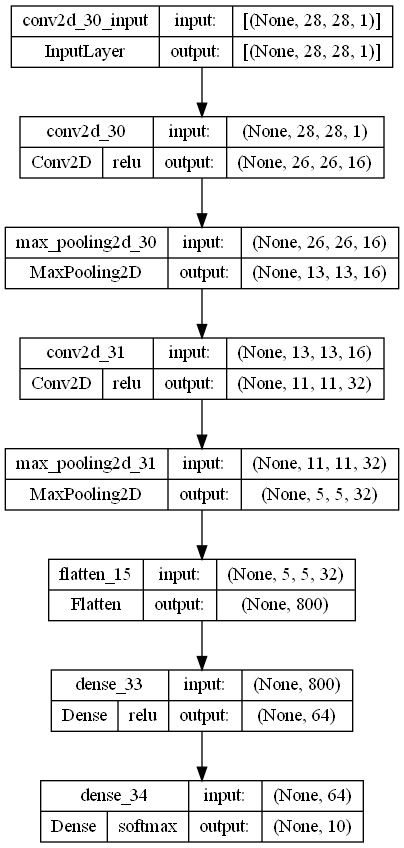

In [72]:

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, show_layer_activations=True, to_file="./Models/baseline_model.png")

In [73]:
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 25s 16ms/step - loss: 0.5397 - accuracy: 0.8062 - val_loss: 0.3830 - val_accuracy: 0.8630
Epoch 2/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3654 - accuracy: 0.8684 - val_loss: 0.3489 - val_accuracy: 0.8708
Epoch 3/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3157 - accuracy: 0.8857 - val_loss: 0.3130 - val_accuracy: 0.8872
Epoch 4/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2862 - accuracy: 0.8954 - val_loss: 0.3200 - val_accuracy: 0.8832
Epoch 5/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2638 - accuracy: 0.9031 - val_loss: 0.2964 - val_accuracy: 0.8939
Epoch 6/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2429 - accuracy: 0.9102 - val_loss: 0.2899 - val_accuracy: 0.8938
Epoch 7/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2250 - accuracy: 0.9158 - val_loss: 0.2966 -

In [74]:
print('\nTraining accuracy:', np.max(history.history['accuracy']))
print('\nValidation accuracy:', np.max(history.history['val_accuracy']))

# in depth evaluation for the last model trained
predictions = model.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9497708082199097

Validation accuracy: 0.9075000286102295
375/375 [==============================] - 2s 5ms/step
Precision:  0.9072773150279587
Recall:  0.9074332686334561


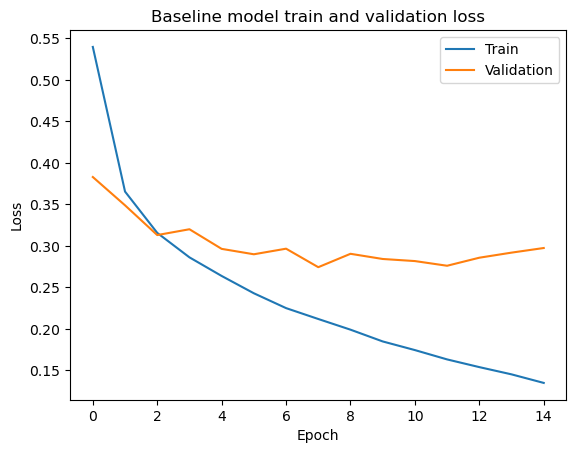

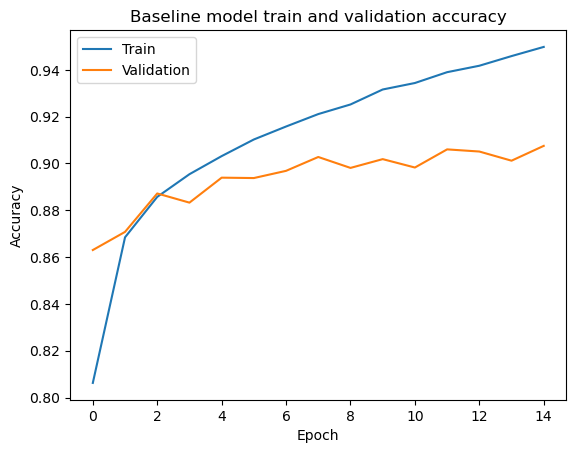

In [75]:
plot_loss(history, "Baseline model")

# Model 2: dropout layer
1. input
2. convolution
3. pooling
4. dropout
5. convolution
6. pooling
7. dropout
8. flatten
9. dense
10. dropout
11. output

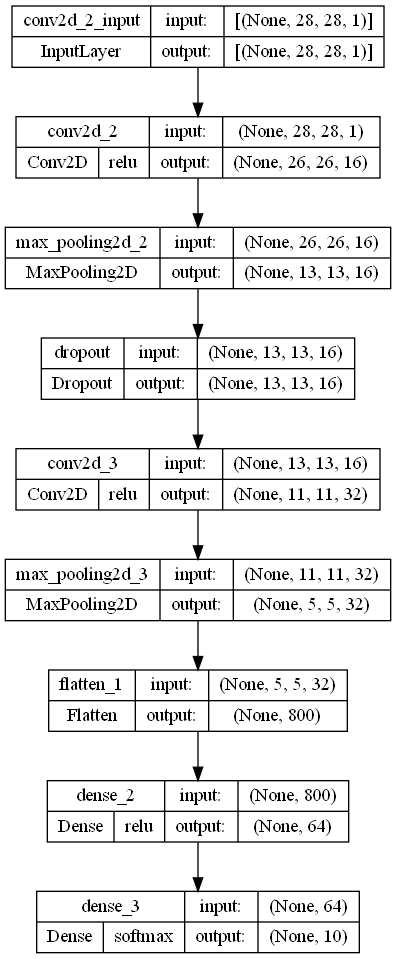

In [10]:

model2 = Sequential()
model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
# model2.add(Dropout(0.3))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model2, show_shapes=True, show_layer_activations=True, to_file="./Models/model2.png")

In [11]:
history2 = model2.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 17s 11ms/step - loss: 0.6065 - accuracy: 0.7775 - val_loss: 0.4331 - val_accuracy: 0.8483
Epoch 2/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4040 - accuracy: 0.8541 - val_loss: 0.3731 - val_accuracy: 0.8648
Epoch 3/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3553 - accuracy: 0.8697 - val_loss: 0.3308 - val_accuracy: 0.8795
Epoch 4/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3250 - accuracy: 0.8798 - val_loss: 0.3097 - val_accuracy: 0.8857
Epoch 5/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3009 - accuracy: 0.8899 - val_loss: 0.2911 - val_accuracy: 0.8931
Epoch 6/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2857 - accuracy: 0.8945 - val_loss: 0.2718 - val_accuracy: 0.9012
Epoch 7/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2689 - accuracy: 0.9012 - val_loss: 0.2667 -

In [12]:
print('\nTraining accuracy:', np.max(history2.history['accuracy']))
print('\nValidation accuracy:', np.max(history2.history['val_accuracy']))

predictions = model2.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9199374914169312

Validation accuracy: 0.9104166626930237
375/375 [==============================] - 1s 4ms/step
Precision:  0.9082183506839805
Recall:  0.9077852999728506


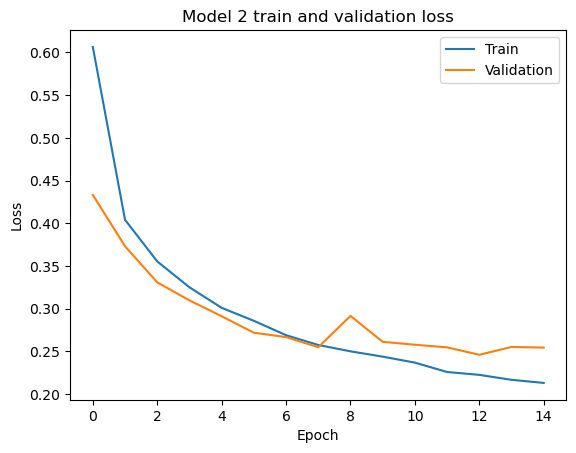

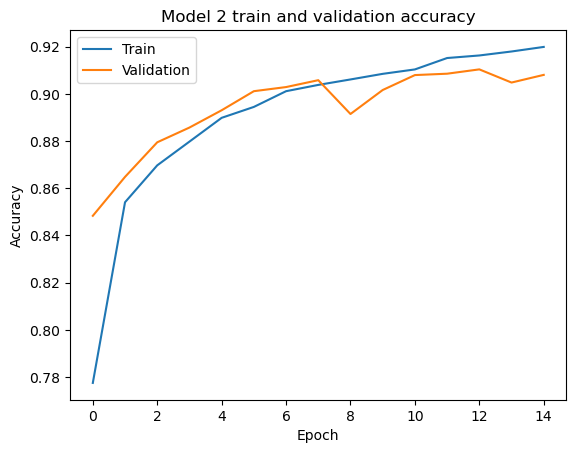

In [13]:
plot_loss(history2, "Model 2")

# Model 3: Double fully connected layer
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. dense
9. output

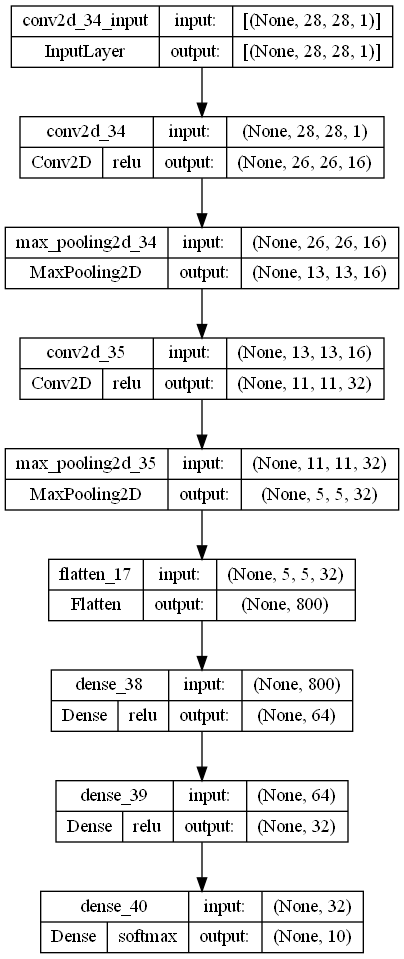

In [79]:
model3 = Sequential()
model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model3, show_shapes=True, show_layer_activations=True, to_file="./Models/model3.png")

In [80]:
history3 = model3.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 36s 21ms/step - loss: 0.5711 - accuracy: 0.7875 - val_loss: 0.4645 - val_accuracy: 0.8260
Epoch 2/15
1500/1500 [==============================] - 30s 20ms/step - loss: 0.3819 - accuracy: 0.8613 - val_loss: 0.3568 - val_accuracy: 0.8733
Epoch 3/15
 373/1500 [======>.......................] - ETA: 27s - loss: 0.3394 - accuracy: 0.8743

In [41]:
print('\nTraining accuracy:', np.max(history3.history['accuracy']))
print('\nValidation accuracy:', np.max(history3.history['val_accuracy']))

predictions = model3.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9501041769981384

Validation accuracy: 0.9079166650772095
375/375 [==============================] - 2s 4ms/step
Precision:  0.9057553671098948
Recall:  0.9055806479541596


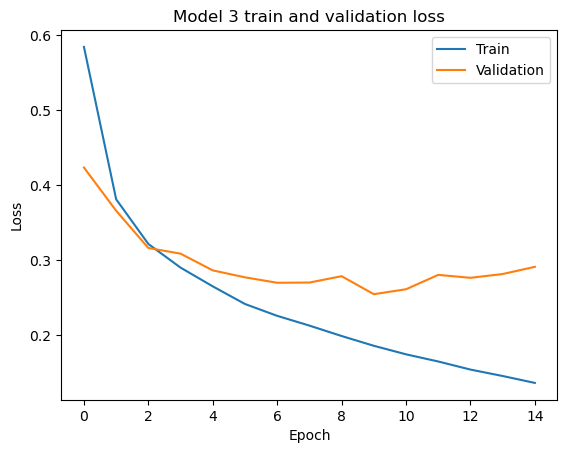

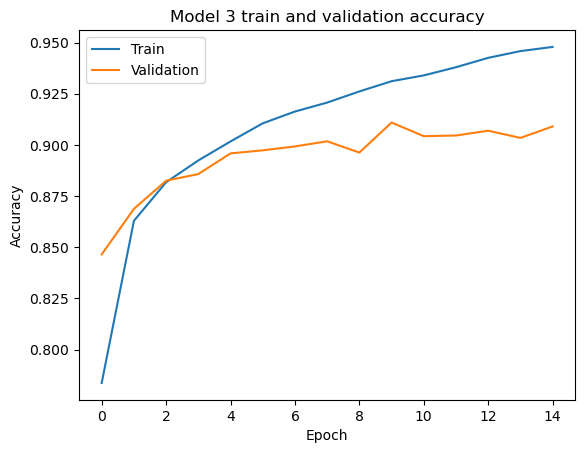

In [17]:
plot_loss(history3, "Model 3")

# Model 4: Layer Normalization
1. input
2. convolution
3. layer normalization
4. pooling
5. convolution
6. layer normalization
7. pooling
8. flatten
9. dense
10. output

In [67]:
model4 = Sequential()
model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model4, show_shapes=True, show_layer_activations=True, to_file="./Models/model4.png")
model4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 batch_normalization_16 (Bat  (None, 26, 26, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 batch_normalization_17 (Bat  (None, 11, 11, 32)       128       
 chNormalization)                                                
                                                     

In [68]:
history4 = model4.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 44s 28ms/step - loss: 0.4100 - accuracy: 0.8519 - val_loss: 0.3251 - val_accuracy: 0.8791
Epoch 2/15
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2843 - accuracy: 0.8939 - val_loss: 0.3506 - val_accuracy: 0.8730
Epoch 3/15
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2444 - accuracy: 0.9090 - val_loss: 0.2790 - val_accuracy: 0.8962
Epoch 4/15
1500/1500 [==============================] - 41s 27ms/step - loss: 0.2174 - accuracy: 0.9198 - val_loss: 0.2782 - val_accuracy: 0.9001
Epoch 5/15
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1931 - accuracy: 0.9283 - val_loss: 0.2953 - val_accuracy: 0.8960
Epoch 6/15
1500/1500 [==============================] - 45s 30ms/step - loss: 0.1762 - accuracy: 0.9348 - val_loss: 0.2802 - val_accuracy: 0.9036
Epoch 7/15
1500/1500 [==============================] - 39s 26ms/step - loss: 0.1585 - accuracy: 0.9407 - val_loss: 0.3489 -

In [69]:
print('\nTraining accuracy:', np.max(history4.history['accuracy']))
print('\nValidation accuracy:', np.max(history4.history['val_accuracy']))

predictions = model4.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9703958630561829

Validation accuracy: 0.9088333249092102
375/375 [==============================] - 3s 7ms/step
Precision:  0.8963436440596222
Recall:  0.8922629583243393


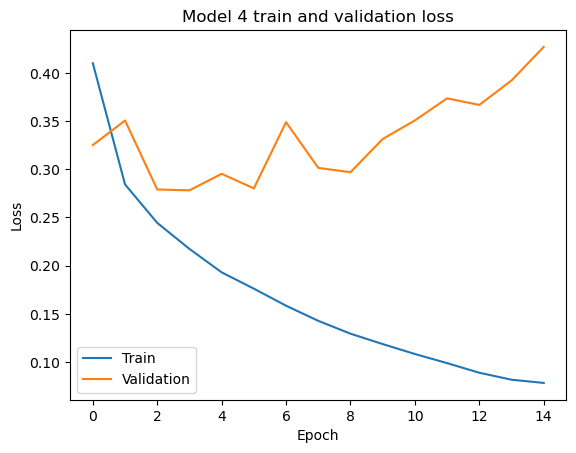

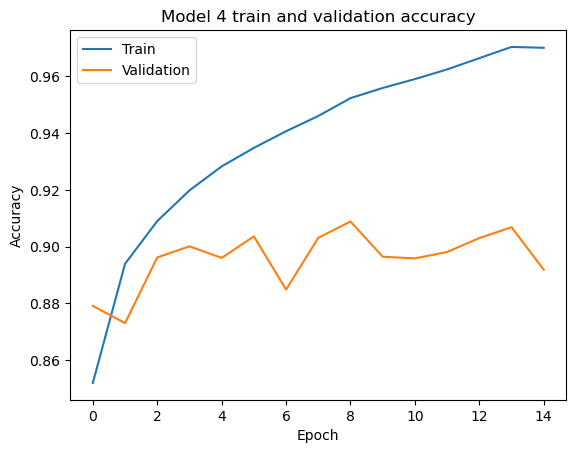

In [70]:
plot_loss(history4, "Model 4")

# Model 5: Lower Learning rate
Same as baseline model, but with a lower learning rate
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. output

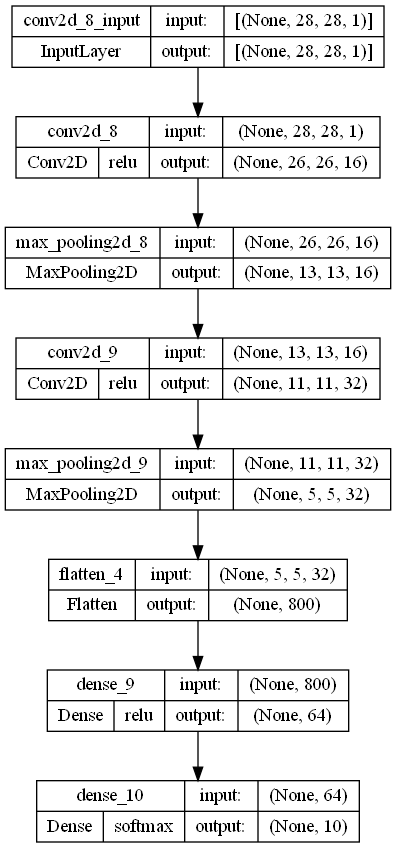

In [22]:
model5 = Sequential()
model5.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0008), metrics=['accuracy'])
plot_model(model5, show_shapes=True, show_layer_activations=True, to_file="./Models/model5.png")

In [23]:
history5 = model5.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 16s 10ms/step - loss: 0.5570 - accuracy: 0.8004 - val_loss: 0.4051 - val_accuracy: 0.8593
Epoch 2/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3739 - accuracy: 0.8653 - val_loss: 0.3605 - val_accuracy: 0.8673
Epoch 3/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3267 - accuracy: 0.8820 - val_loss: 0.3472 - val_accuracy: 0.8752
Epoch 4/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2975 - accuracy: 0.8911 - val_loss: 0.3040 - val_accuracy: 0.8914
Epoch 5/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2735 - accuracy: 0.8998 - val_loss: 0.2908 - val_accuracy: 0.8962
Epoch 6/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2530 - accuracy: 0.9062 - val_loss: 0.2926 - val_accuracy: 0.8944
Epoch 7/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2350 - accuracy: 0.9135 - val_loss: 0.3013 -

In [24]:
print('\nTraining accuracy:', np.max(history5.history['accuracy']))
print('\nValidation accuracy:', np.max(history5.history['val_accuracy']))

predictions = model5.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9445416927337646

Validation accuracy: 0.9079166650772095
375/375 [==============================] - 1s 4ms/step
Precision:  0.9014367294121609
Recall:  0.8996430202828025


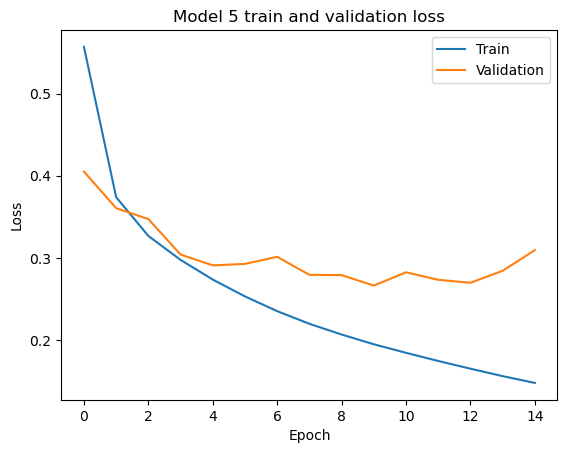

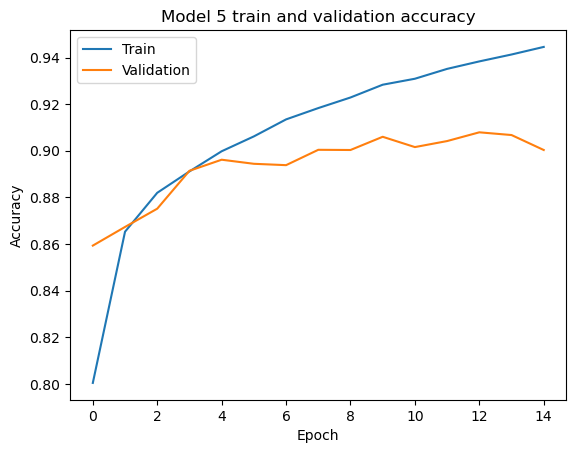

In [25]:
plot_loss(history5, "Model 5")

# Results

In [76]:
print(f"Baseline Validation accuracy: {np.max(history.history['val_accuracy'])}")
print(f"Model 2 Validation accuracy: {np.max(history2.history['val_accuracy'])}")
print(f"Model 3 Validation accuracy: {np.max(history3.history['val_accuracy'])}") # this should be slightly below baseline
print(f"Model 4 Validation accuracy: {np.max(history4.history['val_accuracy'])}")
print(f"Model 5 Validation accuracy: {np.max(history5.history['val_accuracy'])}") # this should be slightly below baseline

Baseline Validation accuracy: 0.9075000286102295
Model 2 Validation accuracy: 0.9104166626930237
Model 3 Validation accuracy: 0.9079166650772095
Model 4 Validation accuracy: 0.9088333249092102
Model 5 Validation accuracy: 0.9079166650772095


# Testing

Dropout model (best one)

In [27]:
print("Testing the dropout model (best model)")
_, test_acc = model2.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

# in depth evaluation
predictions = model2.predict(x_test)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_t = np.argmax(y_test, axis=1)

print("Precision: ", precision_score(y_t, predictions, average='macro'))
print("Recall: ", recall_score(y_t, predictions, average='macro'))
print(confusion_matrix(y_t, predictions))


Testing the dropout model (best model)
313/313 - 1s - loss: 0.2660 - accuracy: 0.9043 - 1s/epoch - 4ms/step

Test accuracy: 0.9042999744415283
313/313 [==============================] - 1s 4ms/step
Precision:  0.9040646875406463
Recall:  0.9043000000000001
[[872   2   9  20   3   0  87   0   7   0]
 [  0 980   1  15   1   0   1   0   2   0]
 [ 21   1 807  17  87   0  65   0   2   0]
 [  7  14   7 921  28   0  20   0   2   1]
 [  0   3  20  31 892   0  49   0   5   0]
 [  0   0   0   0   0 982   0  12   2   4]
 [132   0  50  34  94   0 678   0  12   0]
 [  0   0   0   0   0   9   0 970   1  20]
 [  3   1   0   4   1   2   2   1 986   0]
 [  1   0   0   0   0   5   0  39   0 955]]


Baseline model (second-best one)

In [28]:
print("Testing the batch normalization model (second best model)")

_, test_acc = model4.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

predictions = model4.predict(x_test)

predictions = np.argmax(predictions, axis=1)
y_t = np.argmax(y_test, axis=1)

print("Precision: ", precision_score(y_t, predictions, average='macro'))
print("Recall: ", recall_score(y_t, predictions, average='macro'))
print(confusion_matrix(y_t, predictions))

Testing the batch normalization model (second best model)
313/313 - 2s - loss: 0.4460 - accuracy: 0.8989 - 2s/epoch - 5ms/step

Test accuracy: 0.8988999724388123
313/313 [==============================] - 2s 5ms/step
Precision:  0.8996721506177522
Recall:  0.8989
[[851   0  16  17   1   1 110   0   4   0]
 [  4 971   1  18   1   0   3   0   2   0]
 [ 18   0 833  11  53   0  82   0   3   0]
 [ 28   1  14 905  18   0  26   0   8   0]
 [  2   0  55  28 842   0  72   0   1   0]
 [  0   0   1   0   0 978   0  11   4   6]
 [114   1  55  27  59   0 729   0  15   0]
 [  1   0   0   0   0  23   0 952   1  23]
 [  2   0   6   5   2   2   9   3 971   0]
 [  0   0   0   0   0   6   0  36   1 957]]


In [29]:
# saving the model's weights
model.save_weights('./Models/model_weights.h5')
model2.save_weights('./Models/model2_weights.h5')
model3.save_weights('./Models/model3_weights.h5')
model4.save_weights('./Models/model4_weights.h5')
model5.save_weights('./Models/model5_weights.h5')


# Choice 6: Using another dataset

In [30]:
import pandas as pd
import cv2 as cv
import os

In [31]:
df = pd.read_csv('archive/styles.csv', error_bad_lines=False)

# filter out columns that are not 'id' nor 'articleType'
df = df.filter(items=['id', 'articleType'])

conversion = {
    "Tshirts": 0,
    "Tops": 0,
    "Lounge Tshirts": 0,
    "Jeans": 1,
    "Track Pants": 1,
    "Trousers": 1,
    "Lounge Pants": 1,
    "Leggings": 1,
    "Rain Trousers": 1,
    "Sweaters": 2,
    "Dresses": 3,
    "Waistcoat": 4,
    "Rain Jacket": 4,
    "Jackets": 4,
    "Nehru Jackets": 4,
    "Sandals": 5,
    "Sports Sandals": 5,
    "Shirts": 6,
    "Sweatshirts": 6,
    "Casual Shoes": 7,
    "Sports Shoes": 7,
    "Handbags": 8,
    "Duffel Bag": 8,
    "Booties": 9
}

C:\Users\bais_\AppData\Local\Temp\ipykernel_17952\1790901838.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('archive/styles.csv', error_bad_lines=False)
Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 3

In [32]:
def preprocess_image(image_path):
    # Load the image
    image = cv.imread(image_path)
    height, width = image.shape[:2]
    aspect_ratio = float(width) / float(height)

    # background removal
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    ret, mask = cv.threshold(gray, 240, 255, cv.THRESH_BINARY)
    mask = cv.bitwise_not(mask)
    result = cv.bitwise_and(gray, gray, mask=mask)
    # Replace the background with black
    result[mask == 0] = 0

    # calculating the new dimensions for 28x28 while maintaining the aspect ratio
    if aspect_ratio > 1:
        new_width = 28
        new_height = int(round(new_width / aspect_ratio))
    else:
        new_height = 28
        new_width = int(round(new_height * aspect_ratio))

    # resizing the image using the calculated dimensions
    resized_img = cv.resize(result, (new_width, new_height), interpolation=cv.INTER_AREA)

    # adding padding to make the image 28x28
    padding_x1 = (28 - new_width) // 2
    padding_y1 = (28 - new_height) // 2
    padding_x2 = 28 - new_width - padding_x1
    padding_y2 = 28 - new_height - padding_y1

    resized_img = cv.copyMakeBorder(resized_img, padding_y1, padding_y2, padding_x1, padding_x2, cv.BORDER_CONSTANT)

    # normalization
    normalized_image = resized_img / 255.0

    return normalized_image

In [33]:
x_other = []
y_other = []
for i in range(len(df)):
    id_item = df.iloc[i, 0]
    articleType = df.iloc[i, 1]
    img_path = f'archive/images/{id_item}.jpg'
    exists = os.path.isfile(img_path)
    if articleType in conversion and exists:
        x_other.append(preprocess_image(f'archive/images/{id_item}.jpg'))
        y_other.append(conversion[articleType])

x_other = np.array(x_other)
y_other = to_categorical(np.array(y_other))

## Testing on the other dataset

In [34]:
test_loss, test_acc = model2.evaluate(x_other, y_other, verbose=2)

print('\nTest accuracy:', test_acc)

# in depth evaluation
predictions = model2.predict(x_other)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_other, axis=1)



print("Precision: ", precision_score(y_test, predictions, average='macro'))
print("Recall: ", recall_score(y_test, predictions, average='macro'))

print(confusion_matrix(y_test, predictions))

712/712 - 3s - loss: 3.3982 - accuracy: 0.2002 - 3s/epoch - 4ms/step

Test accuracy: 0.20018458366394043
712/712 [==============================] - 3s 4ms/step
Precision:  0.22070409953566067
Recall:  0.25714992635231726
[[1358  367   15 3138  820   80  170    7 2876    0]
 [  14  954    0  686    0    0    7    0   21    0]
 [  13   19    0  144   15    1    1    0   84    0]
 [  24   43    0  288   46    1    2    5   55    0]
 [   8   11    1  126   34    2    2    0  112    0]
 [  26    1    0   12   63  205    0  129  528    0]
 [ 129  121    3 1345  411   30   73    1 1387    0]
 [  58    2    0  111  232  913    7   24 3534    0]
 [  96    1    0   60   14   34    7   16 1619    0]
 [   0    0    0    0    0    7    0    0    5    0]]


c:\Users\bais_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
occurrences = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i, p in enumerate(predictions):
    if p != y_test[i]:
        occurrences[y_test[i]] += 1

percentages = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):
    percentages[i] = occurrences[i] / np.sum(y_test == i)
print(percentages)

[0.84622353074397, 0.4328180737217598, 1.0, 0.3793103448275862, 0.8851351351351351, 0.7873443983402489, 0.9791428571428571, 0.9950829748002459, 0.12344342176502436, 1.0]
